In [18]:
import sys
import os
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import math as m

In [19]:
# This is the fuction in which we are getting our words from the file 
def give_words_from_file(path_file):
    x=[]
    stop_words = set(stopwords.words('english')) 
    doc_file = open(path_file,"r",errors ="ignore")
    doc_text = doc_file.read()
    words = doc_text.split()
    for r in words:
        r = re.sub(r'[^\w\s]','',r)        # here we are removing commas plus all sing to make our paragrpaph in words 
        r = re.sub(r'\d+', '', r)
        r = r.replace("_"," ")
        r=r.lower()                    # all letter are made small 
        if r in stop_words:            # here i am not taking stop word
            continue
        else:
            if  len(r) <= 3:           # here i am taking works words of length 3 to 14 only
                continue
            elif len(r) >=14:
                continue
            else:
                x=np.append(x,r)
    return x

In [20]:
def update_frequency_of_words(x,output,df):  #here we update the frequency of words in our df 
    index = 0
    for path_file in x:
        words = give_words_from_file(path_file)  # we gets the words in our particular file 
        for i in words:       
            df.iloc[index][i]+=1     # filling no. of words in df
        index+=1
    return df

In [21]:
def put_words_in_array(file): # this function will put our all words into the array 
    x=[]
    stop_words = set(stopwords.words('english')) 
    for path_file in file:
        doc_file = open(path_file,"r",errors ="ignore")
        doc_text = doc_file.read()
        words = set(doc_text.split())
        for r in words:
            r = re.sub(r'[^\w\s]','',r)  # here we are removing commas plus all sign to make our paragrpaph in words
            r = re.sub(r'\d+', '', r)
            r = r.replace("_"," ")
            r=r.lower()             # all letter are made small 
            if r in stop_words:    # here i am not taking stop word  
                continue
            else:
                if  len(r) <= 3:  # here i am taking works words of length 3 to 14 only                
                    continue
                elif len(r) >=14:
                    continue
                else:
                    x=np.append(x,r)
    x = set(x)
    x = list(x)
    return x

In [22]:
def filepath(path):      # in this function we will get the path of the file 
    x=[]
    y=[]
    k=0
    for folder in os.listdir(path):
        path_folder = path + "\\"  +  folder
        for files in os.listdir(path_folder):
            path_file = path_folder + "\\" + files
            x.append(path_file)
            y.append(k)
        k+=1
    return x,y

In [23]:
def get_graph_components(df,words):            # here we will get the componts of words 
    sumx = df.sum(axis = 0, skipna = True) 
    points = {}
    for i in range(max(sumx)+1):      # here we get the max of the word in the particualr row
        points[i]=0
    for k in sumx:
        points[k]+=1
    return points,sumx

In [24]:
def print_graph(points,sumx):  # here we print the graph
    y=[]
    x=[]
    for i in range(max(sumx)):
        y.append(i)
        x.append(points[i])
    plt.plot(y,x)
    plt.axis([0,250 , 0 , 500])
    plt.show()

In [25]:
def drop_coloumns(sumx,df):         # here we drop all unncessary coloumns from our df 
    sumvalue = pd.DataFrame(sumx)
    sumvalue.columns = ["column"]
    sumvalue = sumvalue.sort_values(by="column" , ascending=True)
    values = sumvalue.index[0:(len(sumvalue.index) - 1500)]
    df = df.drop(values,axis = 1)
    return df

In [26]:
def make_dictionary(df,output):   # this we marke dictionary so that we can get predict our ans           
    outval = set(output.iloc[:,0])
    count = {}
    name = list(df)
    for i in outval:
        count[i] = {}
        s = 0
        for j in range(df.shape[1]):
            ans      = output[output[0] == i]
            indexsum = df.iloc[ans.index]
            indexsum  = indexsum.sum(axis = 0, skipna = True)
            count[i][name[j]] = indexsum[j]
            s+=count[i][name[j]]
        count[i]["sumall"] = s
            
            
    return count

In [27]:
def predict(x,dictionary,output,df):
    y = []
    name = list(df)
    outval = set(output.iloc[:,0])
    for i in x:
        words = give_words_from_file(i)
        maxprob = -10000000
        ans = -10000
        for j in outval:
            prob1 = m.log(len(output[output[0]==j])) - m.log(len(output[0]))
            for k in words:
                if k in name:
                    prob1 = prob1 + (m.log(dictionary[j][k] + 1)-m.log(dictionary[j]["sumall"] + len(name)))
            if maxprob<prob1:
                maxprob = prob1
                ans = j
        y.append(ans)
    return y

In [28]:
def accuracy(y_test,y_pred):
    count = 0
    for i in range(len(y_test)):
        if(y_test[i]==y_pred[i]):
            count+=1
    return count

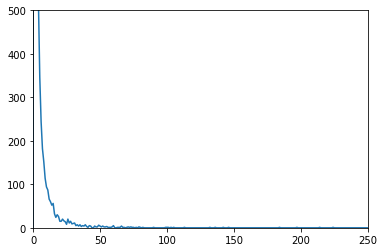

75
120
[10, 10, 1, 15, 17, 14, 15, 3, 9, 1, 16, 6, 6, 12, 7, 11, 16, 12, 2, 8, 4, 11, 11, 17, 10, 15, 18, 18, 0, 3, 5, 11, 9, 8, 3, 13, 12, 7, 7, 10, 12, 17, 0, 3, 12, 9, 18, 10, 0, 16, 10, 18, 12, 14, 9, 8, 9, 13, 9, 12, 5, 9, 4, 9, 5, 18, 1, 5, 18, 5, 9, 13, 16, 19, 5, 9, 5, 9, 16, 17, 19, 5, 7, 16, 7, 0, 16, 0, 7, 8, 19, 16, 16, 17, 2, 14, 3, 9, 16, 16, 6, 5, 9, 9, 14, 0, 2, 9, 5, 19, 11, 9, 5, 15, 19, 13, 4, 2, 5, 19]
[9, 9, 1, 15, 15, 10, 15, 4, 9, 1, 5, 6, 6, 5, 1, 11, 16, 4, 2, 9, 4, 11, 11, 17, 10, 15, 18, 18, 9, 3, 5, 11, 9, 8, 2, 5, 11, 1, 7, 10, 4, 19, 19, 3, 3, 9, 18, 9, 0, 4, 10, 11, 6, 14, 9, 8, 9, 7, 9, 9, 5, 9, 4, 9, 5, 17, 4, 5, 18, 5, 9, 13, 16, 16, 5, 9, 5, 9, 16, 17, 9, 5, 7, 16, 7, 7, 16, 0, 6, 8, 9, 18, 9, 17, 1, 5, 9, 9, 16, 16, 5, 5, 9, 0, 14, 9, 5, 9, 5, 0, 11, 9, 5, 15, 7, 13, 9, 5, 5, 19]


In [29]:
path = r'C:\Users\naive base\news'
x,y=filepath(path)   # we will get the paths of x and y 
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state = 1)  # separtion our file into train test format
words = put_words_in_array(X_train)    # here we get all word in our file into an array 
s = (len(Y_train),len(words))  # tuple to get datafroame 
ans = np.zeros(s,dtype=int)    # 2D array for datafrome 
#################################
df = pd.DataFrame(ans)   # dataframe of ans
df.columns = words       # each coloumn is words
###########################
output = pd.DataFrame(Y_train)   # y_train is put in thd form of dataframe
df = update_frequency_of_words(X_train,output,df)   # in this we are updating no. of words in our 
points,sumx=get_graph_components(df,words)       # here we get the components of the graph
print_graph(points,sumx)
df = drop_coloumns(sumx,df)          # here we drop coloumsn of sumx from df 
dictionary = make_dictionary(df,output)        # here we make dictionary  of ouput 
prediction =  predict(X_test,dictionary,output,df)  # here we predict out all values 
print(accuracy(Y_test,prediction))      # here we get our accuracy in our code 
print(len(Y_test))
print(Y_test)
print(prediction)
